In [1]:
import numpy as np
import pandas as pd
from ripser import ripser, plot_dgms

#%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

import scipy.interpolate as interp

import ipywidgets as widgets
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets import data and take different signals, here we will work with MLII and V5 ECG signals
df=pd.read_csv('123.csv')
df.head()

,'sample #','MLII','V5'
0,0,863,933
1,1,863,933
2,2,863,933
3,3,863,933
4,4,863,933


In [3]:
mlii=df.iloc[:,1]
v5=df.iloc[:,2]

v5_short=v5[47250:52200]#11
v5_short_arryh=v5[48600:52200]# only with arryh, according to the description
# v5_long=v5[46800:53570]#15
# v5_long_arryh=v5[48600:53570]# only with arryh, according to the description
mlii_short=mlii[47250:52200]#11
#mlii_long=mlii[46800:53570]
mlii_short_arryh=mlii[48600:52200]#11
#mlii_long_arryh=mlii[48600:53570]

In [79]:
46800+450


47250

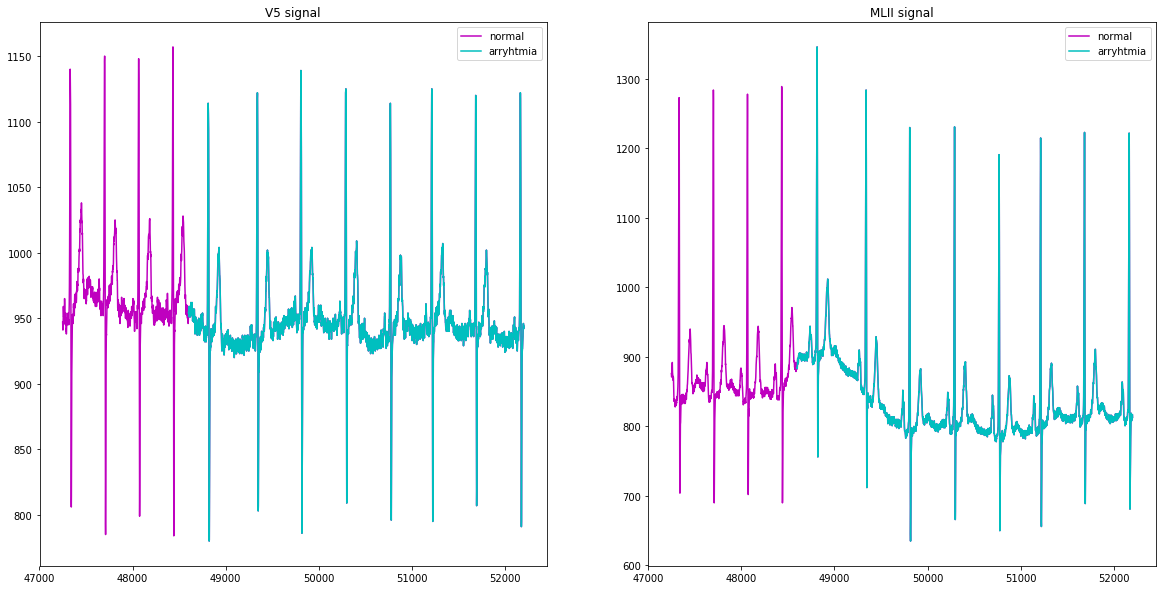

In [4]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('V5 signal')
plt.plot(v5_short,c='m',label='normal')
plt.plot(v5_short_arryh,c='c',label='arryhtmia')
plt.legend()
plt.subplot(1,2,2)
plt.title('MLII signal')
plt.plot(mlii_short,c='m',label='normal')
plt.plot(mlii_short_arryh,c='c',label='arryhtmia')
plt.legend()
plt.show()

In [5]:
v5_short=v5_short.as_matrix()
mlii_short=mlii_short.as_matrix()


Lets try to make sliding window from article:
**SLIDING WINDOWS AND PERSISTENCE:AN APPLICATION OF TOPOLOGICAL METHODS TO SIGNAL ANALYSIS**

$$
SW_M,_\tau f(t)=\begin{pmatrix} f(t) \\ f(t+\tau)\\f(t+M\tau) \end{pmatrix}
$$


In [6]:
def getSlidingWindow(x, dim, Tau, dT):
    N = len(x)
    NWindows = int(np.floor((N-dim*Tau)/dT)) # The number of windows
    if NWindows <= 0:
        print("Error: Tau too large for signal extent")
        return np.zeros((3, dim))
    X = np.zeros((NWindows, dim)) # Create a 2D array which will store all windows
    idx = np.arange(N)
    for i in range(NWindows):
        # Figure out the indices of the samples in this window
        idxx = dT*i + Tau*np.arange(dim) 
        start = int(np.floor(idxx[0]))
        end = int(np.ceil(idxx[-1]))+2
        if end >= len(x):
            X = X[0:i, :]
            break
        # Do spline interpolation to fill in this window, and place
        # it in the resulting array
        X[i, :] = interp.spline(idx[start:end+1], x[start:end+1], idxx)
    return X,NWindows

In [7]:
x=v5_short
y=mlii_short

#sliding window parametre
dim=20
Tau=1
dT=1

func_x=getSlidingWindow(x, dim, Tau, dT)[0]
func_y=getSlidingWindow(y, dim, Tau, dT)[0]


In [8]:
def pca(x,n):
    d=PCA(n_components=n)
    fun=d.fit_transform(x)
    return fun
    

In [9]:
sss=pca(func_x,3)
sss

array([[ -12.97562175,  -10.88368656,  -10.59731226],
       [ -10.48430138,  -11.49697624,   -7.38050274],
       [  -6.98791129,  -12.74604737,   -0.8564585 ],
       ...,
       [-121.75362362,  -78.07221283,  -67.68159103],
       [-104.86907057,  -61.18626947,  -47.19691556],
       [ -92.27138169,  -49.9186723 ,  -34.38618328]])

In [10]:
pca=PCA(n_components=3)
func_1=pca.fit_transform(func_x)
func_2=pca.fit_transform(func_y)


In [11]:
print('quantaty of windows',getSlidingWindow(x, dim, Tau, dT)[1])

quantaty of windows 4930


## For V5

Now lets plot our results and see, how arrhythmia look like in 3D

Text(0.5,0.98,'v5 signal with arryhtmia')

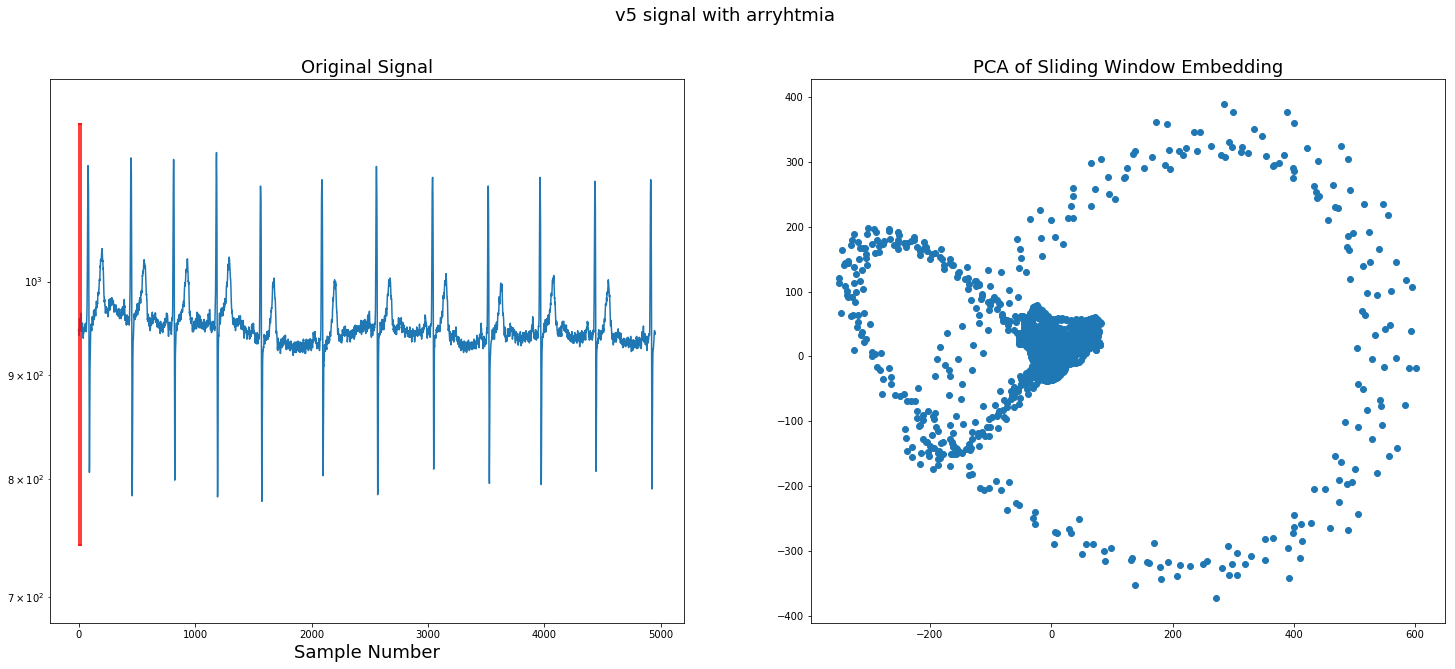

In [12]:
extent=Tau*dim
plt.figure(figsize=(25,10))
ax = plt.subplot(121)
ax.plot(x)
ax.set_ylim((min(x)-100, max(x)+100))
ax.set_title("Original Signal",fontsize=18)
ax.set_xlabel("Sample Number",fontsize=18)
yr = np.max(x)-np.min(x)
yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
ax.plot([extent, extent], yr, 'r')
ax.plot([0, 0], yr, 'r')     
ax.plot([0, extent], [yr[0]]*2, 'r')
ax.plot([0, extent], [yr[1]]*2, 'r')
ax.set_yscale('log')
ax2 = plt.subplot(122)
ax2.set_title("PCA of Sliding Window Embedding",fontsize=18)
ax2.scatter(func_1[:, 1], func_1[:, 2])
plt.suptitle('v5 signal with arryhtmia',fontsize=18)
#ax2.set_aspect('equal', 'datalim')



#plt.tight_layout()


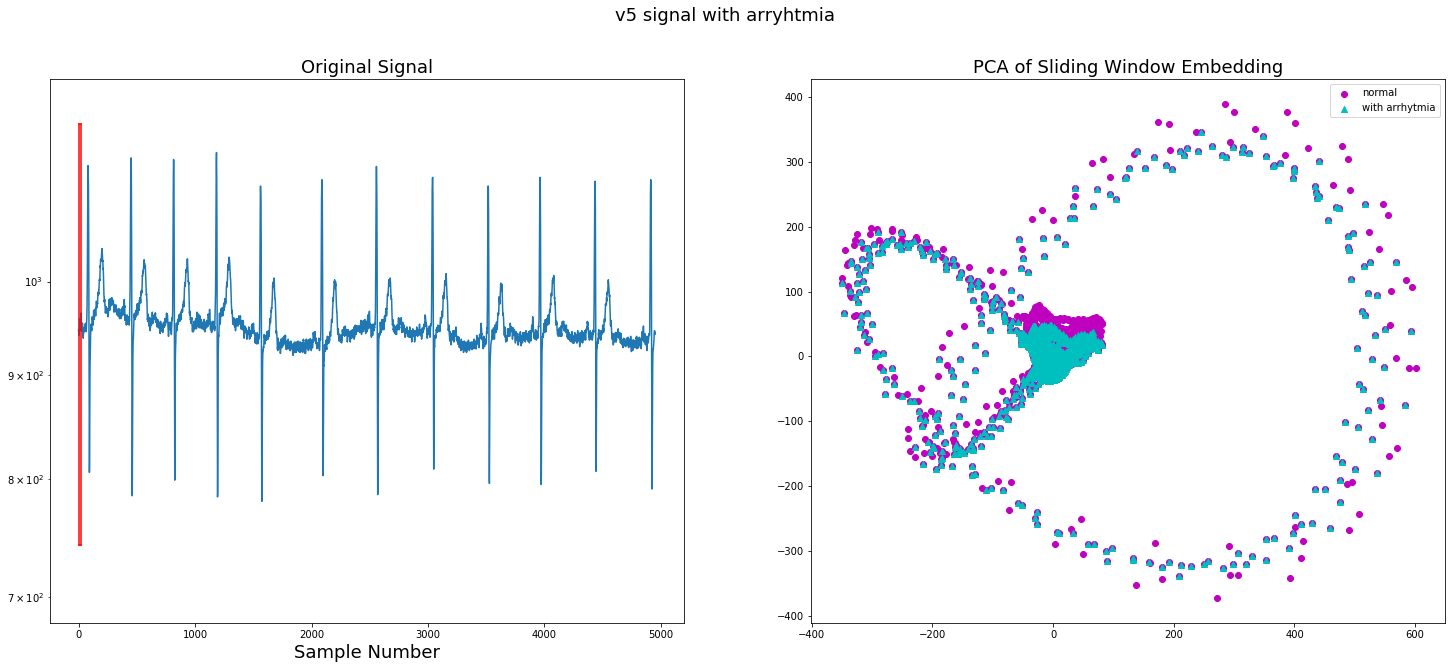

In [14]:
#Now, lets define arrhythmia on this plot
extent=Tau*dim
plt.figure(figsize=(25,10))
ax = plt.subplot(121)
ax.plot(x)
ax.set_ylim((min(x)-100, max(x)+100))
ax.set_title("Original Signal",fontsize=18)
ax.set_xlabel("Sample Number",fontsize=18)
yr = np.max(x)-np.min(x)
yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
ax.plot([extent, extent], yr, 'r')
ax.plot([0, 0], yr, 'r')     
ax.plot([0, extent], [yr[0]]*2, 'r')
ax.plot([0, extent], [yr[1]]*2, 'r')
ax.set_yscale('log')
ax2 = plt.subplot(122)
ax2.set_title("PCA of Sliding Window Embedding",fontsize=18)
ax2.scatter(func_1[:, 1], func_1[:, 2],c='m',marker='o',label='normal')
ax2.scatter(func_1[:, 1][1350:], func_1[:, 2][1350:],c='c',marker='^',label='with arrhytmia')
plt.suptitle('v5 signal with arryhtmia',fontsize=18)
plt.legend()
#ax2.set_aspect('equal', 'datalim')


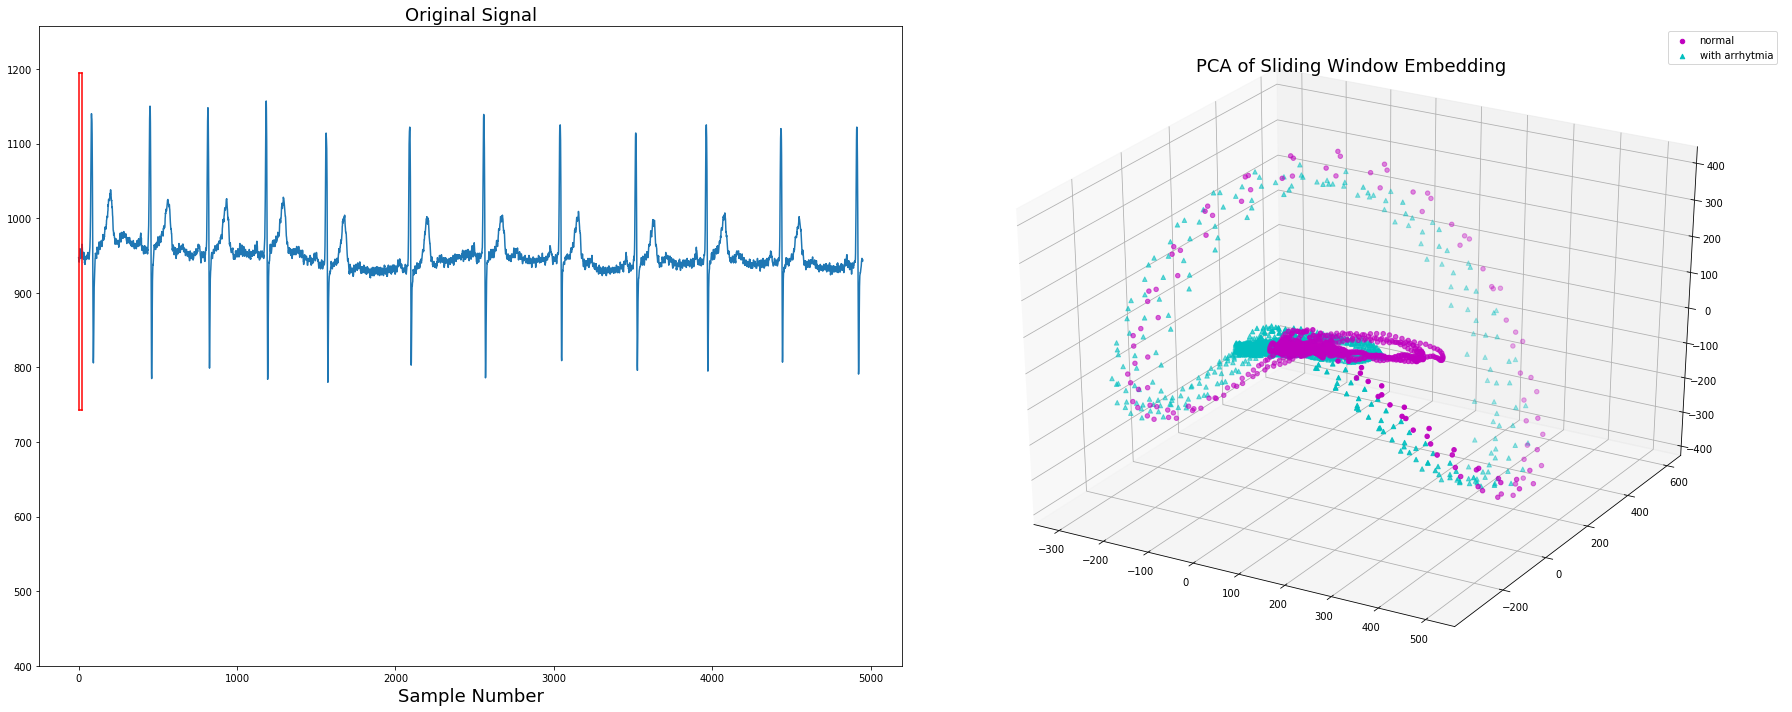

In [15]:
plt.figure(figsize=(25,10))
ax = plt.subplot(121)
ax.plot(x)
ax.set_ylim((400, max(x)+100))
ax.set_title("Original Signal",fontsize=18)
ax.set_xlabel("Sample Number",fontsize=18)
yr = np.max(x)-np.min(x)
yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
ax.plot([extent, extent], yr, 'r')
ax.plot([0, 0], yr, 'r')     
ax.plot([0, extent], [yr[0]]*2, 'r')
ax.plot([0, extent], [yr[1]]*2, 'r')
ax2 = plt.subplot(122, projection = '3d')
ax2.set_title("PCA of Sliding Window Embedding",fontsize=18)
ax2.scatter(func_1[:, 0][:1349],func_1[:, 1][:1349], func_1[:, 2][:1349],c='m',label='normal')
ax2.scatter(func_1[:, 0][1350:],func_1[:, 1][1350:], func_1[:, 2][1350:],c='c',marker='^',label='with arrhytmia')
plt.legend()
plt.tight_layout()


#plt.tight_layout()


## For MLII

Text(0.5,0.98,'MLII signal with arryhtmia')

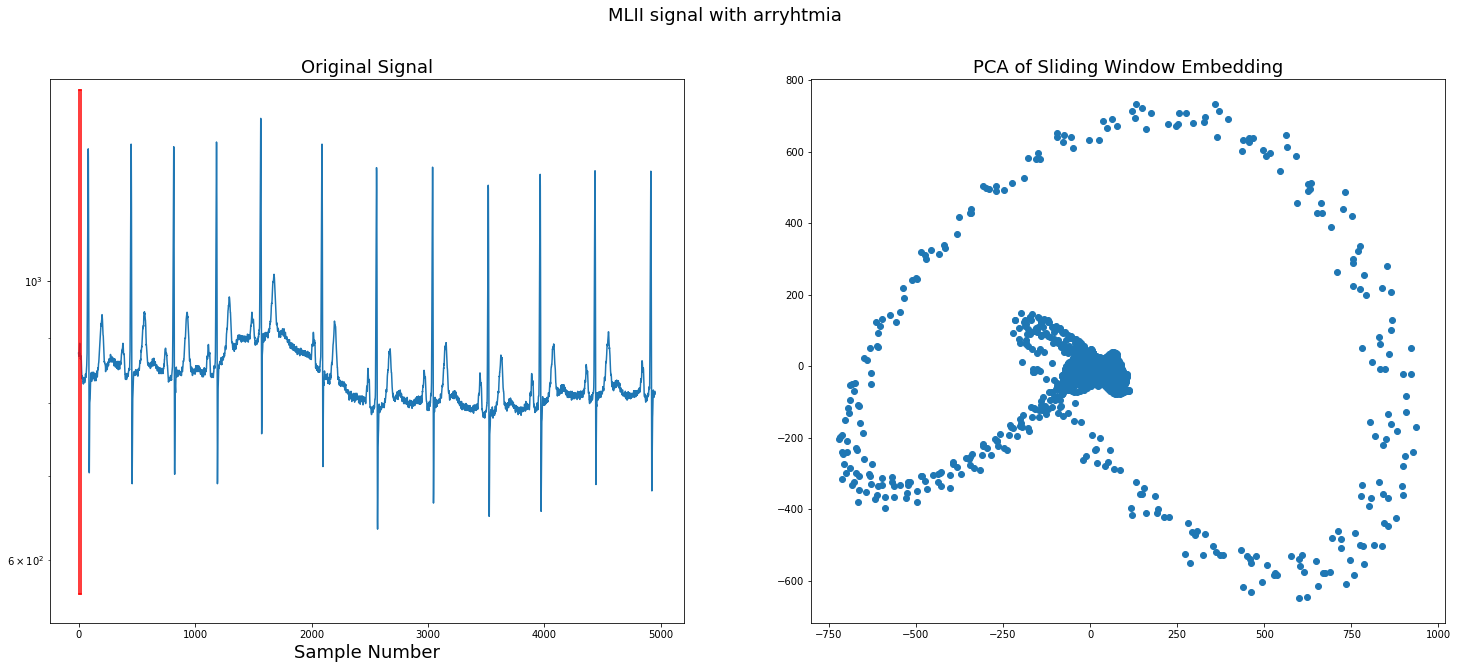

In [16]:
extent=Tau*dim
plt.figure(figsize=(25,10))
ax = plt.subplot(121)
ax.plot(y)
ax.set_ylim((min(y)-100, max(y)+100))
ax.set_title("Original Signal",fontsize=18)
ax.set_xlabel("Sample Number",fontsize=18)
yr = np.max(y)-np.min(y)
yr = [np.min(y)-0.1*yr, np.max(y)+0.1*yr]
ax.plot([extent, extent], yr, 'r')
ax.plot([0, 0], yr, 'r')     
ax.plot([0, extent], [yr[0]]*2, 'r')
ax.plot([0, extent], [yr[1]]*2, 'r')
ax.set_yscale('log')
ax2 = plt.subplot(122)
ax2.set_title("PCA of Sliding Window Embedding",fontsize=18)
ax2.scatter(func_2[:, 1], func_2[:, 2])

plt.suptitle('MLII signal with arryhtmia',fontsize=18)
#ax2.set_aspect('equal', 'datalim')


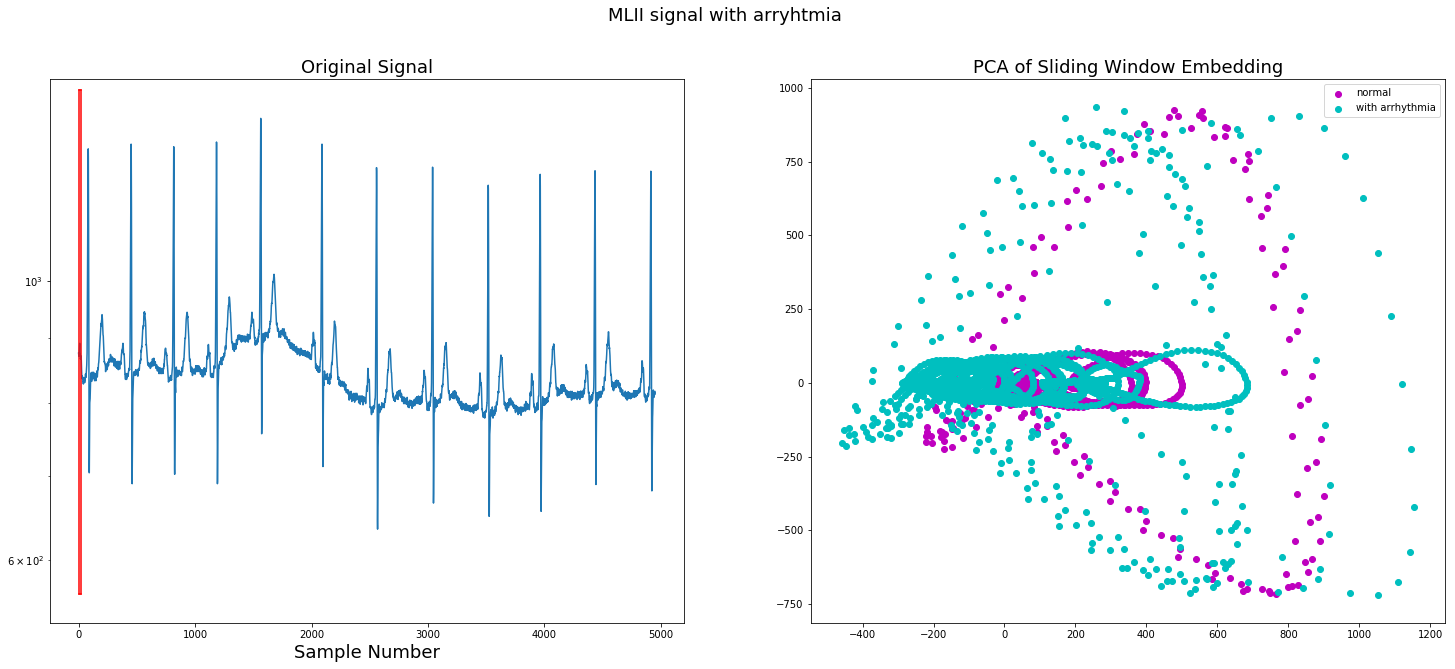

In [114]:
extent=Tau*dim
plt.figure(figsize=(25,10))
ax = plt.subplot(121)
ax.plot(y)
ax.set_ylim((min(y)-100, max(y)+100))
ax.set_title("Original Signal",fontsize=18)
ax.set_xlabel("Sample Number",fontsize=18)
yr = np.max(y)-np.min(y)
yr = [np.min(y)-0.1*yr, np.max(y)+0.1*yr]
ax.plot([extent, extent], yr, 'r')
ax.plot([0, 0], yr, 'r')     
ax.plot([0, extent], [yr[0]]*2, 'r')
ax.plot([0, extent], [yr[1]]*2, 'r')
ax.set_yscale('log')
ax2 = plt.subplot(122)
ax2.set_title("PCA of Sliding Window Embedding",fontsize=18)
ax2.scatter(func_2[:, 0][:1349], func_2[:, 1][:1349],c='m',label='normal')
ax2.scatter(func_2[:, 0][1350:], func_2[:, 1][1350:],c='c',label='with arrhythmia')
plt.suptitle('MLII signal with arryhtmia',fontsize=18)
plt.legend()
#ax2.set_aspect('equal', 'datalim')


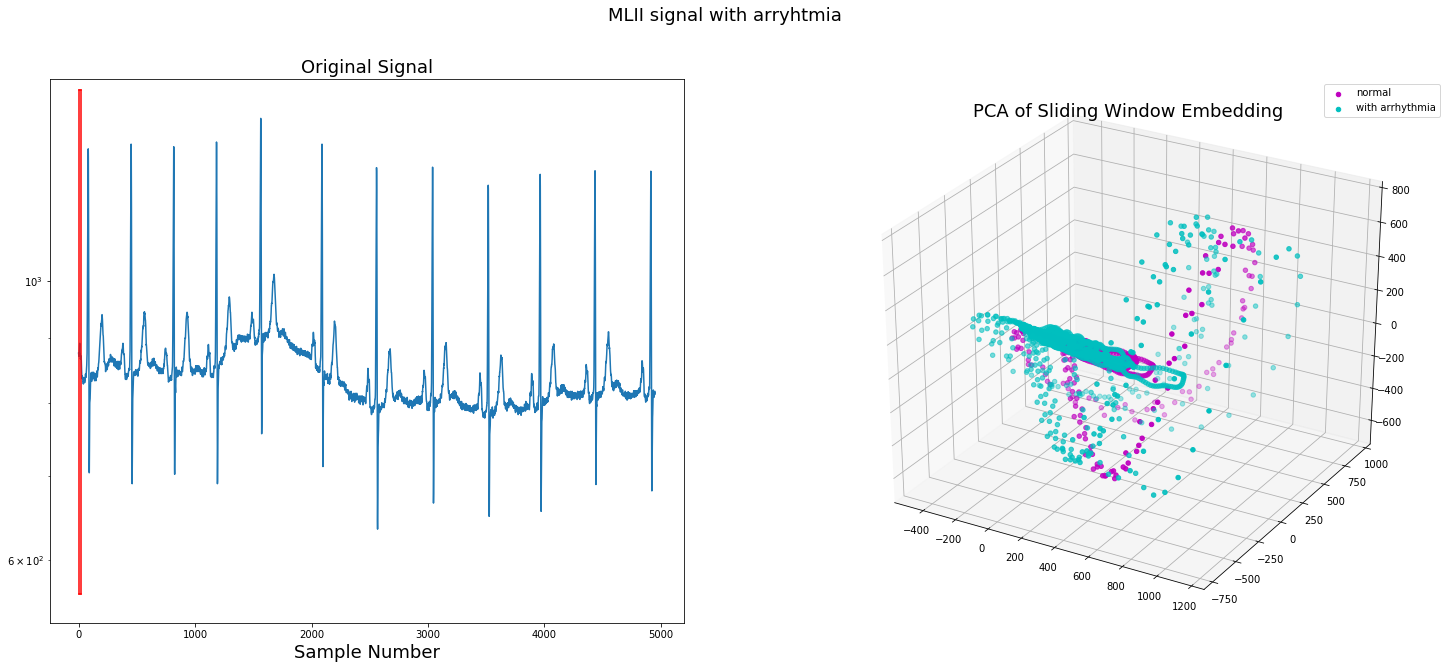

In [17]:
extent=Tau*dim
plt.figure(figsize=(25,10))
ax = plt.subplot(121)
ax.plot(y)
ax.set_ylim((min(y)-100, max(y)+100))
ax.set_title("Original Signal",fontsize=18)
ax.set_xlabel("Sample Number",fontsize=18)
yr = np.max(y)-np.min(y)
yr = [np.min(y)-0.1*yr, np.max(y)+0.1*yr]
ax.plot([extent, extent], yr, 'r')
ax.plot([0, 0], yr, 'r')     
ax.plot([0, extent], [yr[0]]*2, 'r')
ax.plot([0, extent], [yr[1]]*2, 'r')
ax.set_yscale('log')
ax2 = plt.subplot(122,projection = '3d')
ax2.set_title("PCA of Sliding Window Embedding",fontsize=18)
ax2.scatter(func_2[:, 0][:1349],func_2[:, 1][:1349], func_2[:, 2][:1349],c='m',label='normal')
ax2.scatter(func_2[:, 0][1450:],func_2[:, 1][1450:], func_2[:, 2][1450:],c='c',label='with arrhythmia')
plt.suptitle('MLII signal with arryhtmia',fontsize=18)
plt.legend()
#ax2.set_aspect('equal', 'datalim')


# Normal ECG

In [18]:
df1=pd.read_csv('100.csv')


mlii1=df1.iloc[:,1]
v5_1=df1.iloc[:,2]
v5_c=v5_1[:4950]#11

mlii_c=mlii1[:4950]


mlii_cn=mlii_c.as_matrix()
v5_cn=v5_c.as_matrix()


x=v5_cn
y=mlii_cn
dim=20
Tau=1
dT=1
graph_exp_x=getSlidingWindow(x, dim, Tau, dT)[0]
graph_exp_y=getSlidingWindow(y, dim, Tau, dT)[0]


pca=PCA(n_components=3)
f=pca.fit_transform(graph_exp_x)
ff=pca.fit_transform(graph_exp_y)

In [135]:
52200-47250

4950

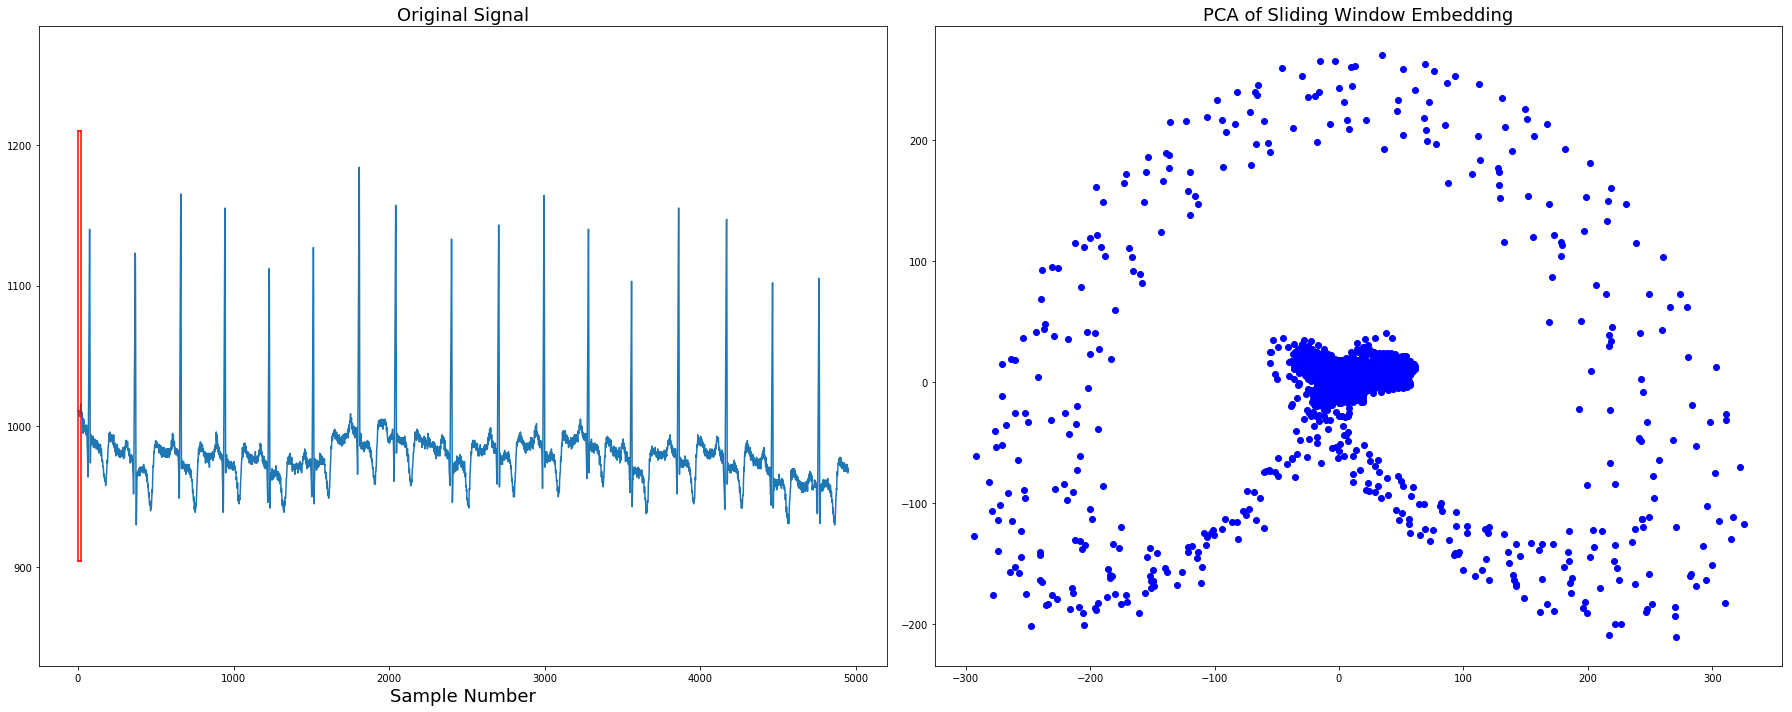

In [19]:
plt.figure(figsize=(25,10))
ax = plt.subplot(121)
ax.plot(x)
ax.set_ylim((min(x)-100, max(x)+100))
ax.set_title("Original Signal",fontsize=18)
ax.set_xlabel("Sample Number",fontsize=18)
yr = np.max(x)-np.min(x)
yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
ax.plot([extent, extent], yr, 'r')
ax.plot([0, 0], yr, 'r')     
ax.plot([0, extent], [yr[0]]*2, 'r')
ax.plot([0, extent], [yr[1]]*2, 'r')
ax2 = plt.subplot(122)
ax2.set_title("PCA of Sliding Window Embedding",fontsize=18)
ax2.scatter(f[:, 1], f[:, 2],c='b',label='normal')
#ax2.scatter(f[:, 0][1800:6749], f[:, 1][1800:6749],c='r',label='with arrhytmia')
plt.tight_layout()

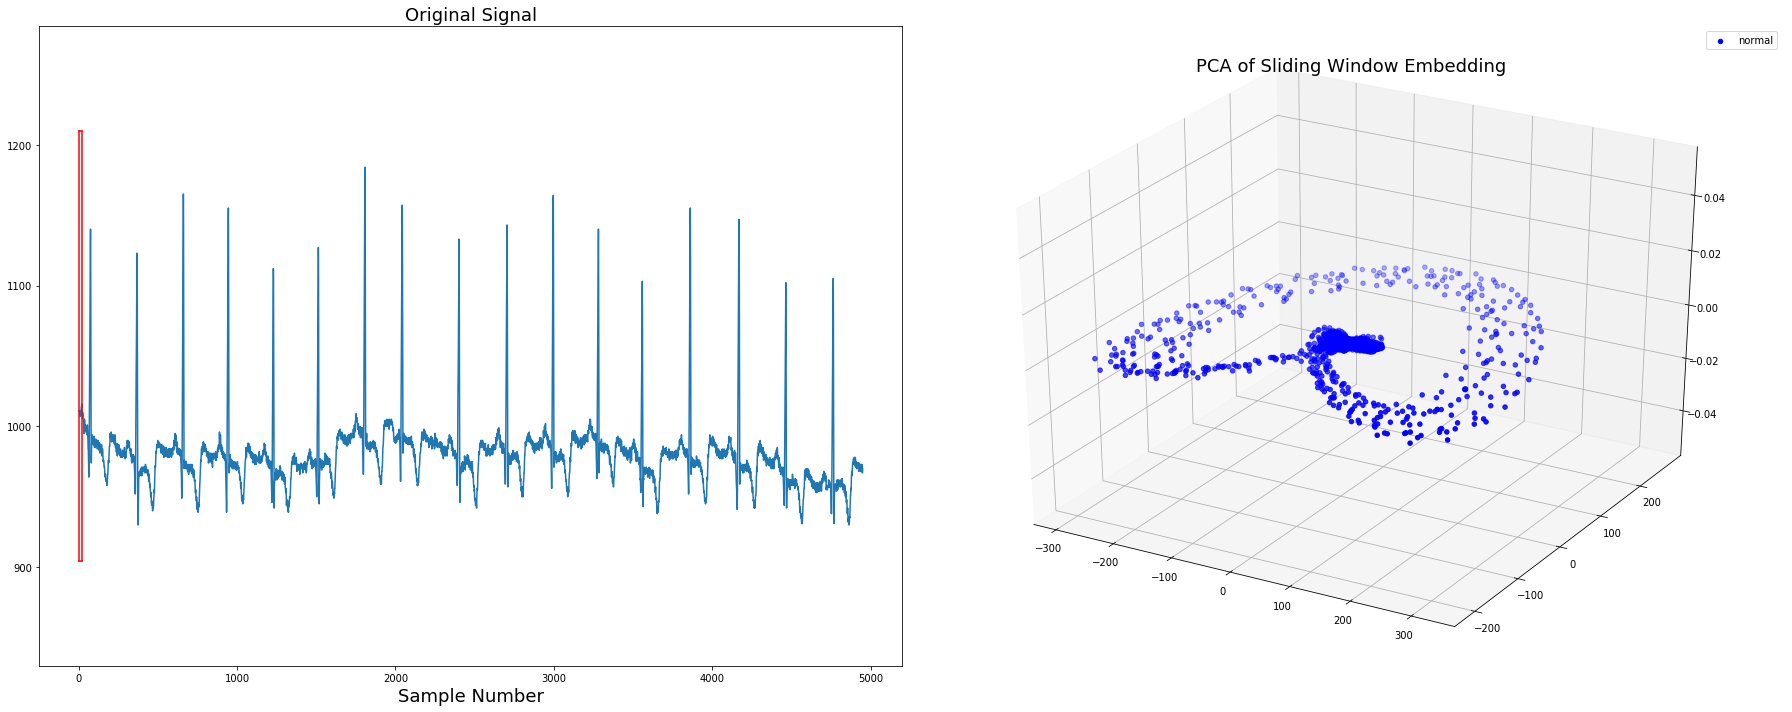

In [20]:
plt.figure(figsize=(25,10))
ax = plt.subplot(121)
ax.plot(x)
ax.set_ylim((min(x)-100, max(x)+100))
ax.set_title("Original Signal",fontsize=18)
ax.set_xlabel("Sample Number",fontsize=18)
yr = np.max(x)-np.min(x)
yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
ax.plot([extent, extent], yr, 'r')
ax.plot([0, 0], yr, 'r')     
ax.plot([0, extent], [yr[0]]*2, 'r')
ax.plot([0, extent], [yr[1]]*2, 'r')
ax2 = plt.subplot(122, projection = '3d')
ax2.set_title("PCA of Sliding Window Embedding",fontsize=18)
ax2.scatter(f[:, 1],f[:,2],c='b',label='normal')
#ax2.scatter(f[:, 0][1800:6749], f[:, 1][1800:6749],c='r',label='with arrhytmia')
plt.legend()
plt.tight_layout()

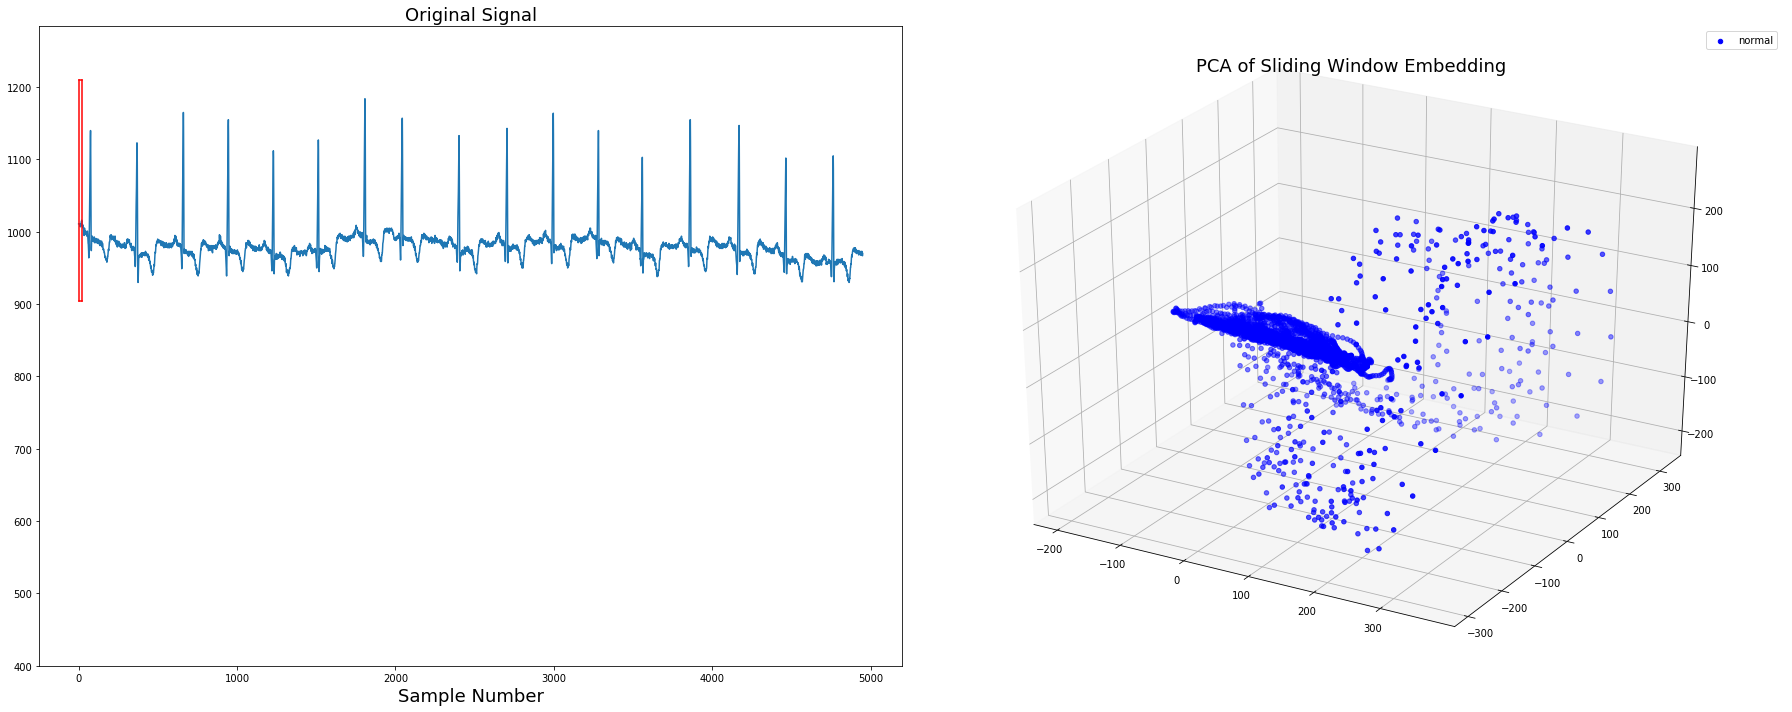

In [21]:
plt.figure(figsize=(25,10))
ax = plt.subplot(121)
ax.plot(x)
ax.set_ylim((400, max(x)+100))
ax.set_title("Original Signal",fontsize=18)
ax.set_xlabel("Sample Number",fontsize=18)
yr = np.max(x)-np.min(x)
yr = [np.min(x)-0.1*yr, np.max(x)+0.1*yr]
ax.plot([extent, extent], yr, 'r')
ax.plot([0, 0], yr, 'r')     
ax.plot([0, extent], [yr[0]]*2, 'r')
ax.plot([0, extent], [yr[1]]*2, 'r')
ax2 = plt.subplot(122, projection = '3d')
ax2.set_title("PCA of Sliding Window Embedding",fontsize=18)
ax2.scatter(f[:, 0],f[:, 1],f[:,2],c='b',label='normal')
#ax2.scatter(f[:, 0][1800:6749], f[:, 1][1800:6749],c='r',label='with arrhytmia')
plt.legend()
plt.tight_layout()

# for MLII

In [22]:
a=(ff[:, 1], ff[:, 2])
b=(ff[:, 0], ff[:, 1])
c=(ff[:, 0],ff[:, 1], ff[:, 2])

(array([-3.17285672, -3.34829205, -3.44166421, ..., 23.7385271 ,
        23.67069797, 22.38033992]),
 array([ 26.37237779,  25.02362655,  23.45793259, ..., -16.20443129,
        -16.71057387, -15.75831492]))

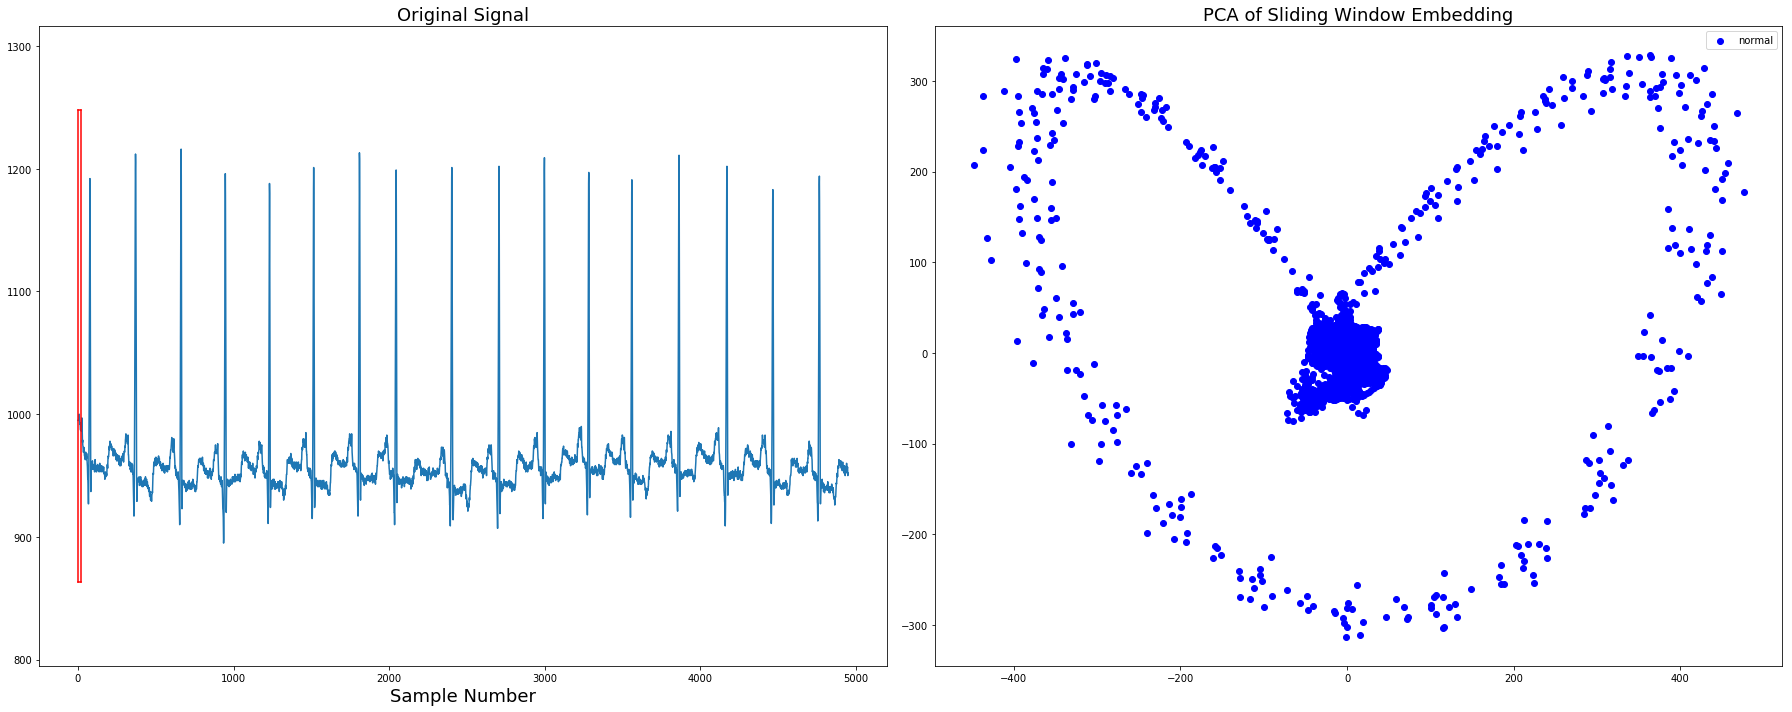

In [23]:
plt.figure(figsize=(25,10))
ax = plt.subplot(121)
ax.plot(y)
ax.set_ylim((min(y)-100, max(y)+100))
ax.set_title("Original Signal",fontsize=18)
ax.set_xlabel("Sample Number",fontsize=18)
yr = np.max(y)-np.min(y)
yr = [np.min(y)-0.1*yr, np.max(y)+0.1*yr]
ax.plot([extent, extent], yr, 'r')
ax.plot([0, 0], yr, 'r')     
ax.plot([0, extent], [yr[0]]*2, 'r')
ax.plot([0, extent], [yr[1]]*2, 'r')
ax2 = plt.subplot(122)
ax2.set_title("PCA of Sliding Window Embedding",fontsize=18)
ax2.scatter(ff[:, 1], ff[:, 2],c='b',label='normal')
#ax2.scatter(f[:, 0][1800:6749], f[:, 1][1800:6749],c='r',label='with arrhytmia')
plt.legend()
plt.tight_layout()

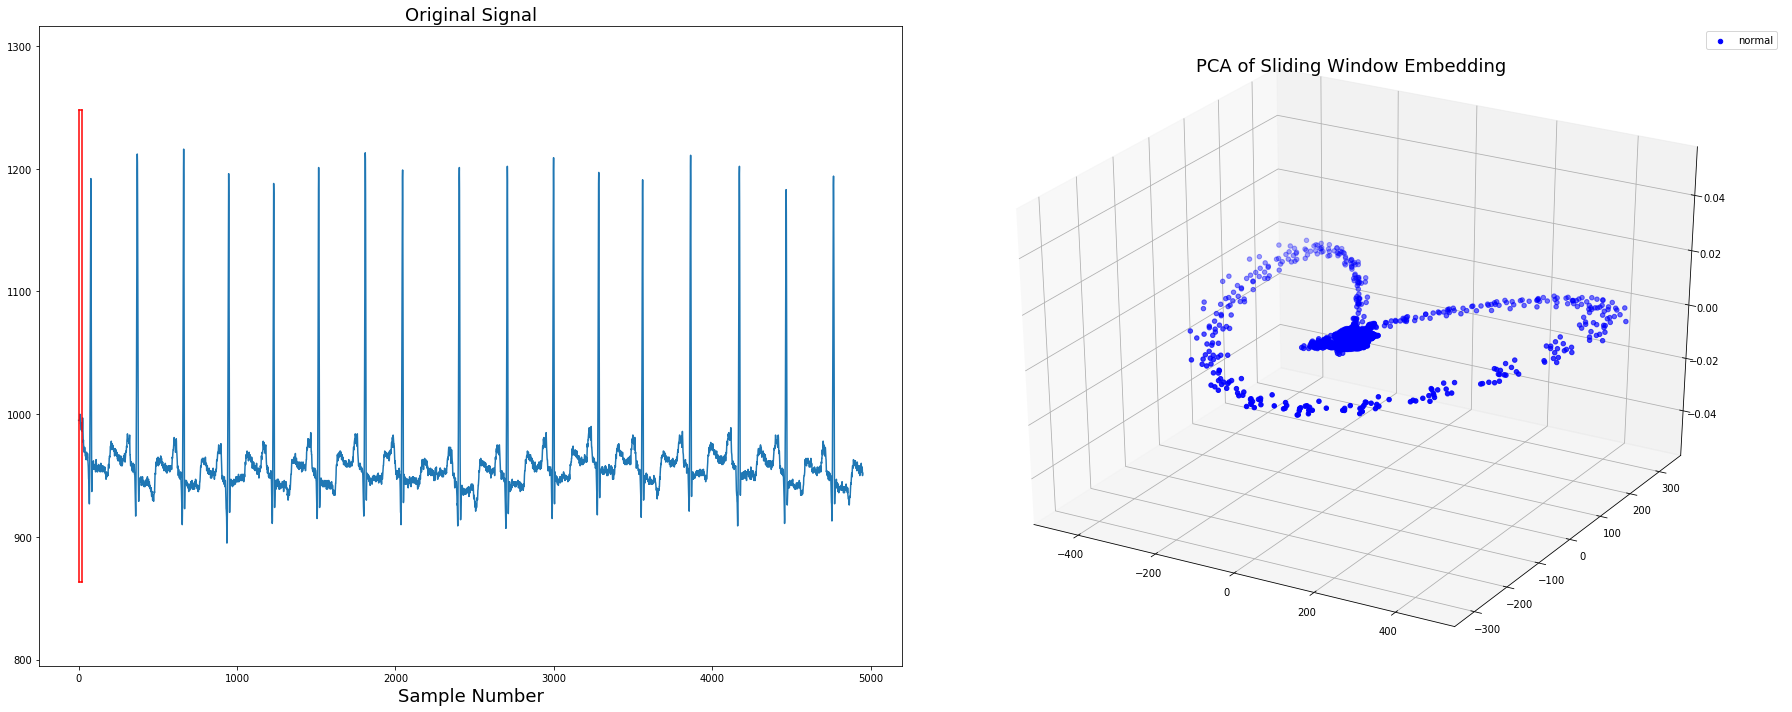

In [24]:
plt.figure(figsize=(25,10))
ax = plt.subplot(121)
ax.plot(y)
ax.set_ylim((min(y)-100, max(y)+100))
ax.set_title("Original Signal",fontsize=18)
ax.set_xlabel("Sample Number",fontsize=18)
yr = np.max(y)-np.min(y)
yr = [np.min(y)-0.1*yr, np.max(y)+0.1*yr]
ax.plot([extent, extent], yr, 'r')
ax.plot([0, 0], yr, 'r')     
ax.plot([0, extent], [yr[0]]*2, 'r')
ax.plot([0, extent], [yr[1]]*2, 'r')
ax2 = plt.subplot(122, projection = '3d')
ax2.set_title("PCA of Sliding Window Embedding",fontsize=18)
ax2.scatter(ff[:, 1],ff[:,2],c='b',label='normal')
#ax2.scatter(f[:, 0][1800:6749], f[:, 1][1800:6749],c='r',label='with arrhytmia')
plt.legend()
plt.tight_layout()

In [26]:
from sklearn.cluster import KMeans
from collections import Counter
from scipy.spatial.distance import cdist

In [148]:
ff.shape

(4929, 3)

In [27]:
#for V5 signal with arrhythmia
n=5
kmeans1=KMeans(n_clusters=n,random_state=1).fit(func_1.flatten().reshape(-1,1))
labels_one=kmeans1.labels_.reshape(4929,3)

clustered_one = np.copy(func_1)
for i in range(n):
    clustered_one[labels_one == i] = kmeans1.cluster_centers_[i]

In [28]:
#for V5 signal without arrhythmia
n=5
kmeans2=KMeans(n_clusters=n,random_state=1).fit(f.flatten().reshape(-1,1))
labels_two=kmeans2.labels_.reshape(4929,3)

clustered_two = np.copy(f)
for i in range(n):
    clustered_two[labels_two == i] = kmeans2.cluster_centers_[i]

In [29]:
#for MLII signal with arrhythmia
n=5
kmeans3=KMeans(n_clusters=n,random_state=1).fit(func_2.flatten().reshape(-1,1))
labels_three=kmeans3.labels_.reshape(4929,3)

clustered_three = np.copy(func_2)
for i in range(n):
    clustered_three[labels_three == i] = kmeans3.cluster_centers_[i]

In [30]:
#for MLII signal without arrhythmia
n=5
kmeans4=KMeans(n_clusters=n,random_state=1).fit(ff.flatten().reshape(-1,1))
labels_four=kmeans4.labels_.reshape(4929,3)

clustered_four = np.copy(ff)
for i in range(n):
    clustered_four[labels_four == i] = kmeans4.cluster_centers_[i]

In [31]:
#just to check how wasserstein works, compare two same set of pounts
n=5
kmeans5=KMeans(n_clusters=n,random_state=1).fit(f.flatten().reshape(-1,1))
labels_five=kmeans5.labels_.reshape(4929,3)

clustered_five = np.copy(f)
for i in range(n):
    clustered_five[labels_five == i] = kmeans5.cluster_centers_[i]

In [32]:
masses_one = []
weights_one = []
for i in range(n):
    masses_one.append(kmeans1.cluster_centers_[i][0])
    weights_one.append(sum((labels_one == i).flatten()))
    
masses_two = []
weights_two = []
for i in range(n):
    masses_two.append(kmeans2.cluster_centers_[i][0])
    weights_two.append(sum((labels_two == i).flatten()))
    
masses_three = []
weights_three = []
for i in range(n):
    masses_three.append(kmeans3.cluster_centers_[i][0])
    weights_three.append(sum((labels_three == i).flatten()))
    
    

masses_four = []
weights_four = []
for i in range(n):
    masses_four.append(kmeans4.cluster_centers_[i][0])
    weights_four.append(sum((labels_four == i).flatten()))
    
    
masses_five = []
weights_five = []
for i in range(n):
    masses_five.append(kmeans5.cluster_centers_[i][0])
    weights_five.append(sum((labels_five == i).flatten()))

In [33]:
def signature(masses,weights):
    sig=[]
    for i in range (len(masses)):
        sig.append((masses[i],weights[i]))
    return np.array(sig)

sig_one = signature(masses_one, weights_one)
sig_two = signature(masses_two, weights_two)
sig_three = signature(masses_three, weights_three)
sig_four = signature(masses_four, weights_four)
sig_five = signature(masses_five, weights_five)

In [34]:
from scipy.optimize import linear_sum_assignment
#Now we find Wasserstein distance for V5 signals
cost=cdist(sig_one[:,0].reshape(n,1),sig_two[:,0].reshape(n,1))
row_ind,col_ind=linear_sum_assignment(cost)
cost[row_ind,col_ind].sum()

291.09645491117186

In [35]:
#Now we find Wasserstein distance for MLII signals
cost=cdist(sig_three[:,0].reshape(n,1),sig_four[:,0].reshape(n,1))
row_ind,col_ind=linear_sum_assignment(cost)
cost[row_ind,col_ind].sum()

876.2717471357238

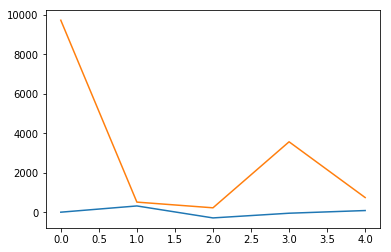

In [43]:
plt.plot(sig_four)

In [36]:
cost=cdist(sig_two[:,0].reshape(n,1),sig_five[:,0].reshape(n,1))
row_ind,col_ind=linear_sum_assignment(cost)
cost[row_ind,col_ind].sum()

0.0

In [62]:
import time
import numpy as np
from scipy import sparse
from ripser import ripser, plot_dgms
from DGMTools import *

%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>


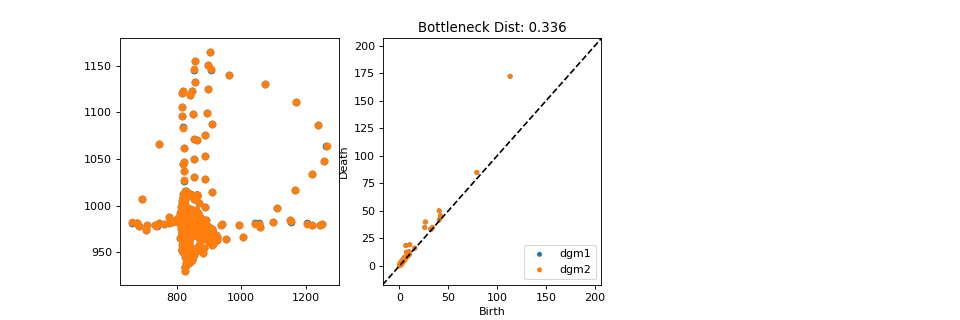

In [69]:
N = 1000
# t = np.linspace(0, 2*np.pi, N+1)[0:N]
X = np.zeros((N, 2))
X[:, 0] = vv
X[:, 1] = vvv
I1 = ripser(X)['dgms'][1]

# Now, add noise to the points
X2 = X + 0.1*np.random.randn(N, 2)
I2 = ripser(X2)['dgms'][1]

# Perform the matching
(matchidxb, bdist, bD) = getBottleneckDist(I1, I2)
#(matchidxw, wdist, wD) = getWassersteinDist(I1, I2)

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X2[:, 0], X2[:, 1])
plt.subplot(132)
plotBottleneckMatching(I1, I2, matchidxb, bD)
plt.title("Bottleneck Dist: %.3g"%bdist)
# plt.subplot(133)
# plotWassersteinMatching(I1, I2, matchidxw)
# plt.title("Wasserstein Dist: %.3g"%wdist)
plt.show()

In [49]:
N = 400
t = np.linspace(0, 2*np.pi, N+1)[0:N]
X = np.zeros((N, 2))
len(f)

4929

In [65]:
vvv=v5_c[0:1000]

In [68]:
vv=mlii[0:1000]